In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
import seaborn as sns

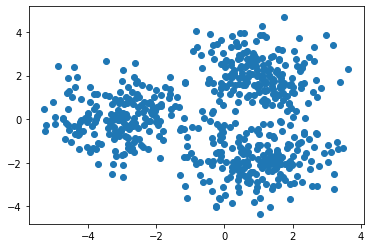

In [2]:
data_raw = np.load("kmeans2d.npy")  # 2*600
data = data_raw.T
N = data_raw.shape[1]
plt.scatter(data_raw[0], data_raw[1])

In [3]:
def kmeans(data, k, iteration):
    centers = np.random.permutation(data)[:k]
    #centers = data[np.random.randint(0, N, size=k)]  # initialize the centers
    for ite in range(iteration):
        M = np.zeros((N, k))  # store the belonging cluster for each data
        for i in range(N):  # compute the cloest distance for each data 
            idx = np.argmin([np.linalg.norm(data[i] - centers[j]) for j in range(k)])
            M[i, idx] = 1
            
        for i in range(k): # update the centers
            indices = np.nonzero(M[:,i])
            centers[i] = np.mean(data[indices], axis=0)
    return centers, M

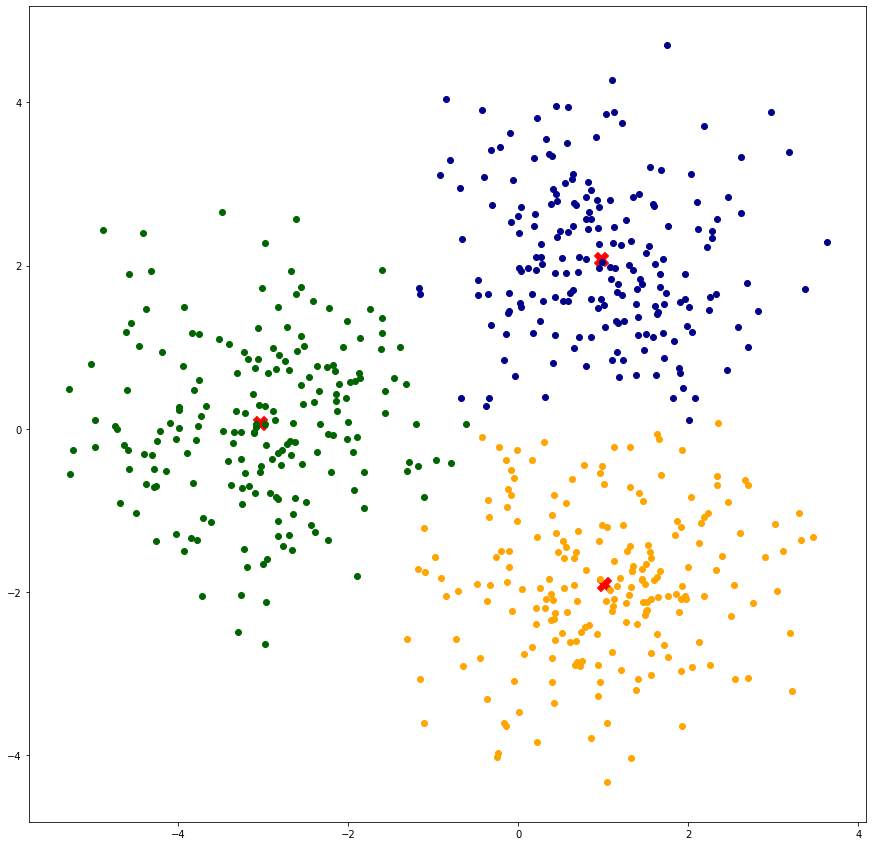

In [5]:
colors = ["darkblue", "darkgreen", "orange", "darkred", "deeppink"]
centers, M = kmeans(data, 3,  50)
plt.scatter(centers[:,0], centers[:,1], s=200, color="red", marker="X")
for i in range(M.shape[1]):
    idx = np.nonzero(M[:,i])
    group = data[idx]
    plt.scatter(group[:,0], group[:,1], color=colors[i])

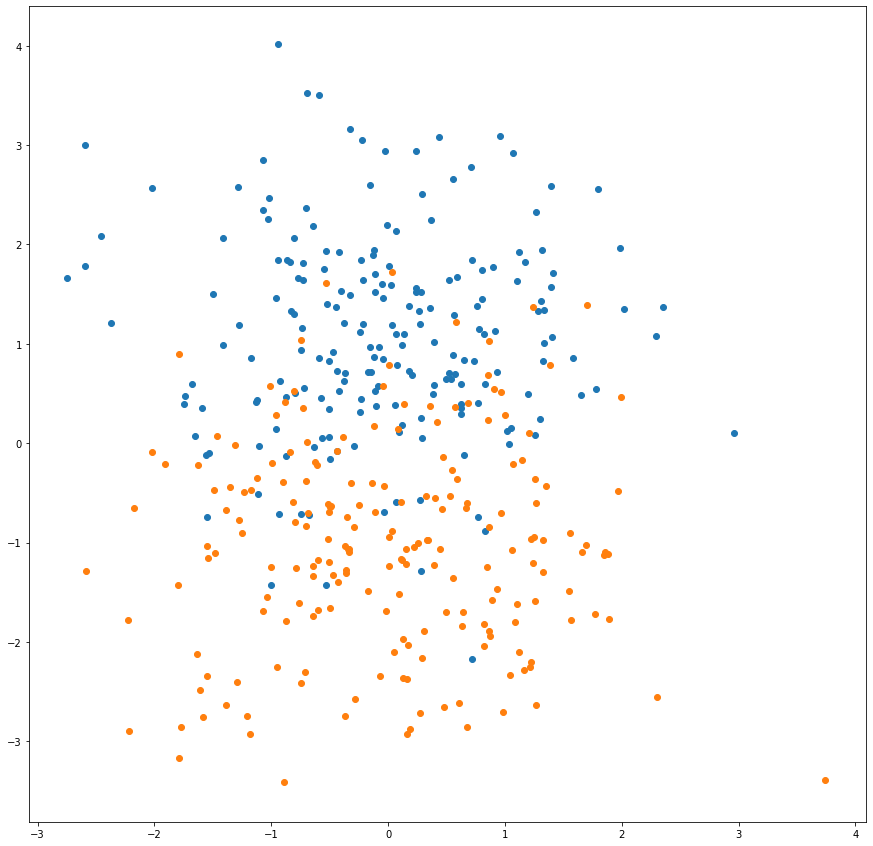

In [7]:
data_knn = np.load("knn2d.npy").T  # 400*2
labels = np.load("knn2dlabels.npy")  # 400
plt.scatter(data_knn[labels==0, 0], data_knn[labels==0, 1])
plt.scatter(data_knn[labels==1, 0], data_knn[labels==1, 1])

(13224, 2)


(-4.328818644547435, 4.7058005699614665)

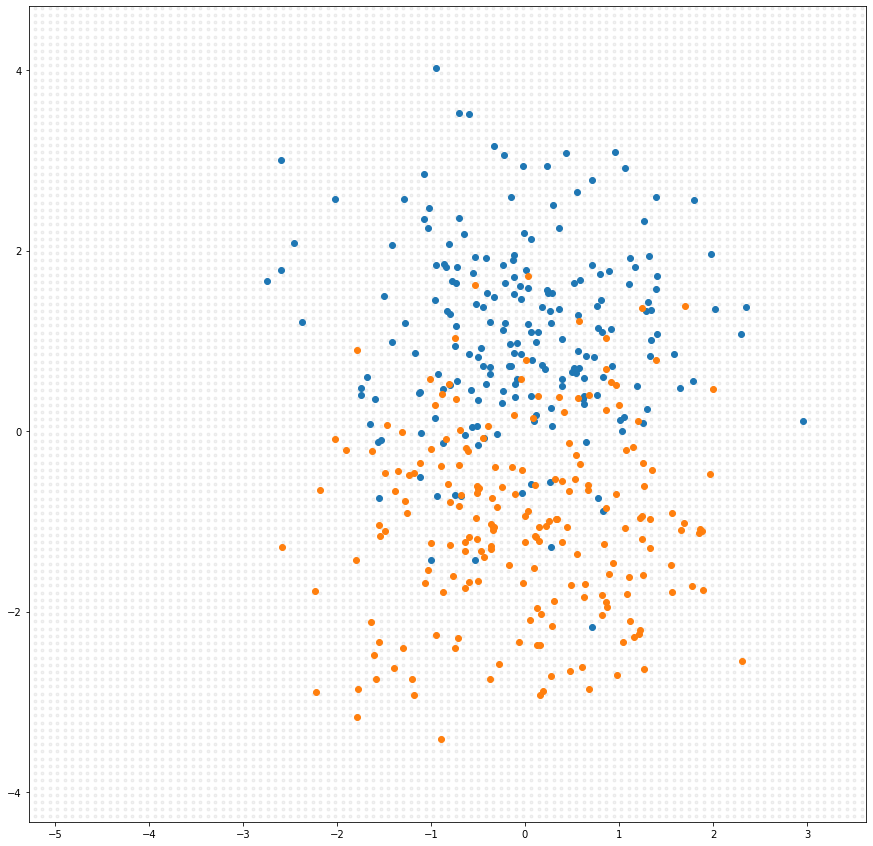

In [8]:
xseq = np.arange(np.min(data[:,0])-0.1, np.max(data[:,0])+0.1, 0.08)
yseq = np.arange(np.min(data[:,1])-0.1, np.max(data[:,1])+0.1, 0.08)
xgrid, ygrid = np.meshgrid(xseq, yseq)
test_data = np.hstack((xgrid.reshape(-1, 1), ygrid.reshape(-1, 1)))
print(test_data.shape)
plt.scatter(test_data[:, 0], test_data[:,1], color="gray", marker=".", alpha=0.1)
plt.scatter(data_knn[labels==0, 0], data_knn[labels==0, 1])
plt.scatter(data_knn[labels==1, 0], data_knn[labels==1, 1])
plt.xlim(min(data[:, 0]), max(data[:, 0]))
plt.ylim(min(data[:, 1]), max(data[:, 1]))

In [56]:
def knn(data_knn, labels, test_data, k):
    N = test_data.shape[0]
    nearest_neigh = [np.argsort(np.sum((test_data[i] - data_knn)**2, axis=1))[:k] for i in range(N)]
    labels_neigh = [labels[nearest_neigh[i]] for i in range(N)]
    predict = np.mean(labels_neigh, axis=1)
    predict_labels = [1 if (predict[i] > 0.5) else 0 for i in range(N)]
    return np.array(predict_labels)

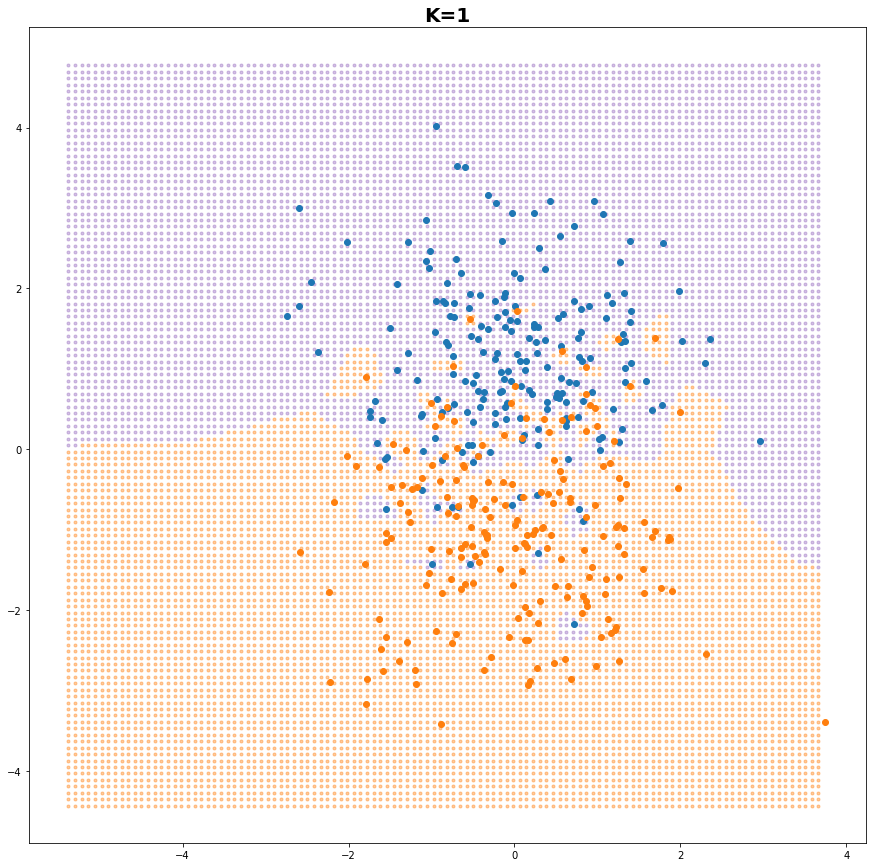

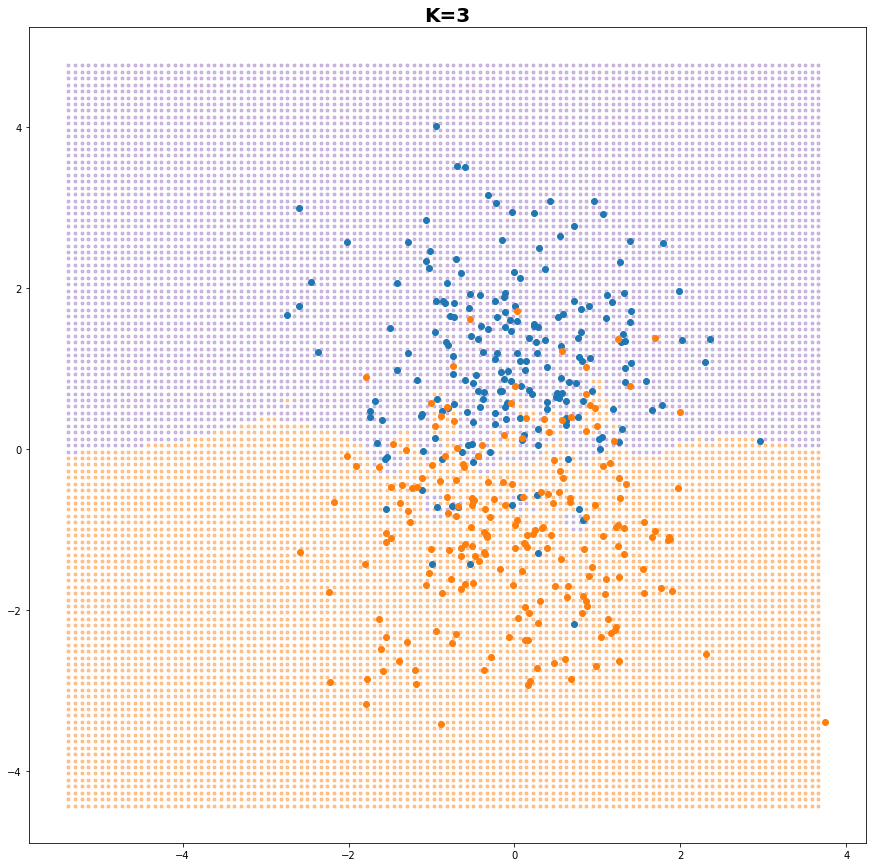

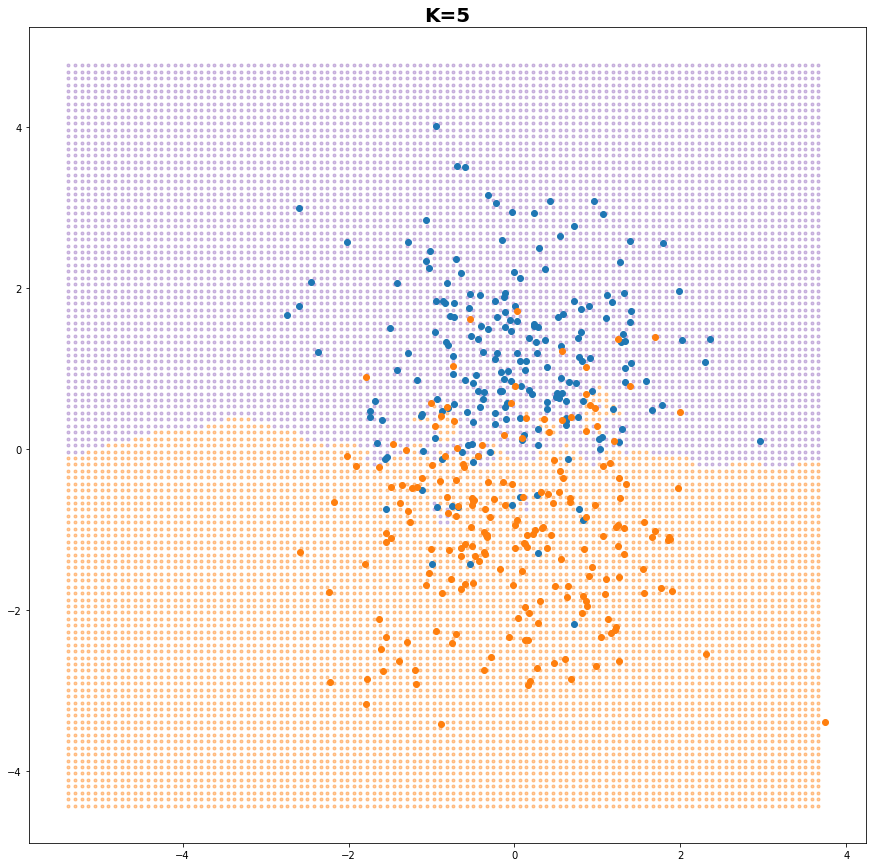

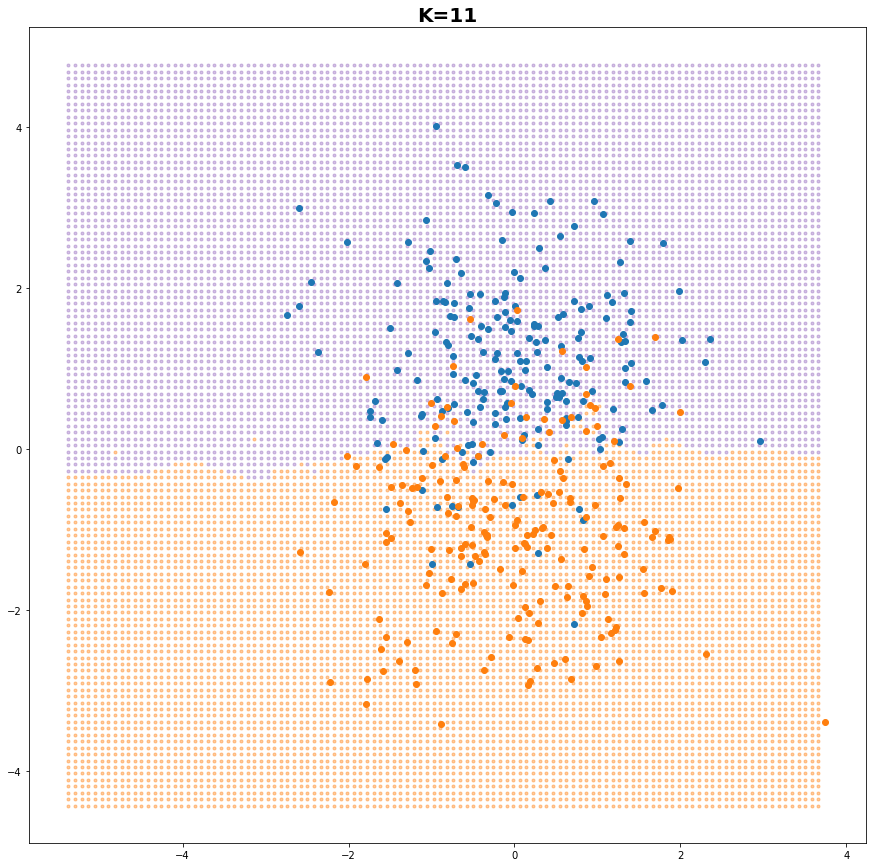

In [65]:
K = [1, 3, 5, 11]
for k in K:
    predict_labels = knn(data_knn, labels, test_data, k)
    plt.scatter(test_data[predict_labels==1, 0], test_data[predict_labels==1, 1], marker=".", color=sns.color_palette()[1], alpha=0.4)
    plt.scatter(test_data[predict_labels==0, 0], test_data[predict_labels==0, 1], marker=".", color=sns.color_palette()[4], alpha=0.4)
    plt.scatter(data_knn[labels==0, 0], data_knn[labels==0, 1])
    plt.scatter(data_knn[labels==1, 0], data_knn[labels==1, 1])
    plt.title(f"K={k}", fontsize=20, fontweight='bold')
    plt.show()

# Choosing K via cross-validation.